In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('house.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [5]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())


In [6]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [7]:
df['rooms_per_households'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [11]:
df = df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1)


In [12]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_households,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


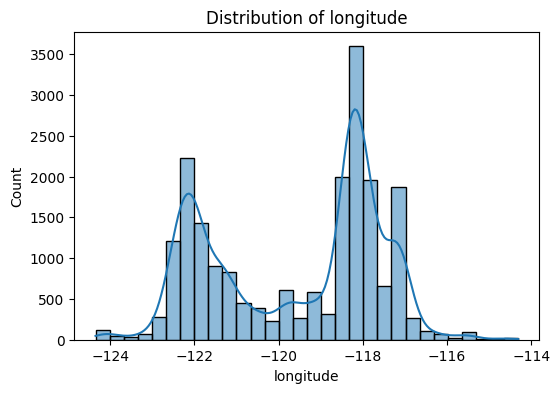

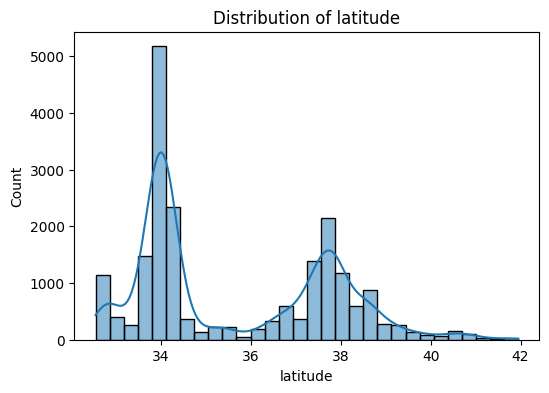

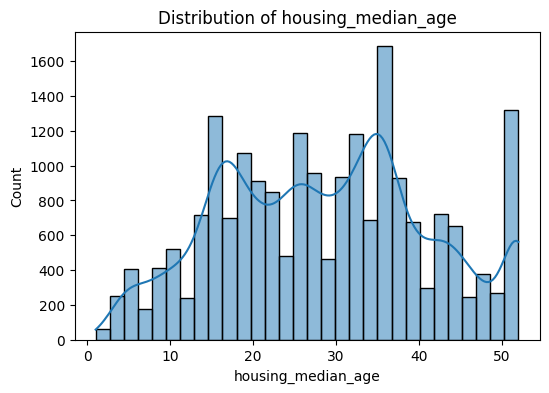

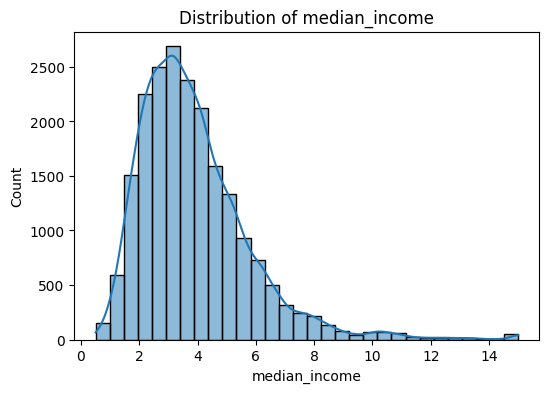

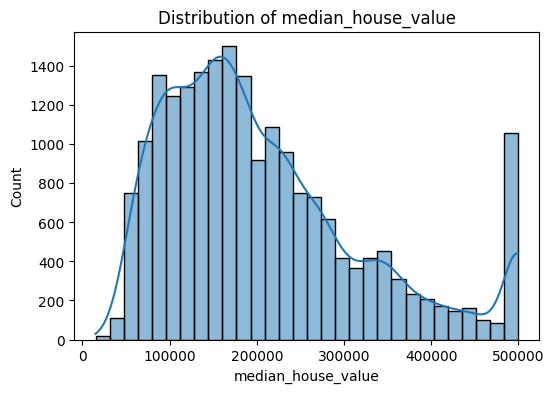

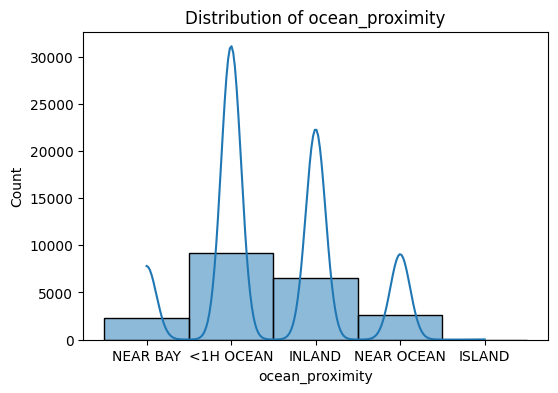

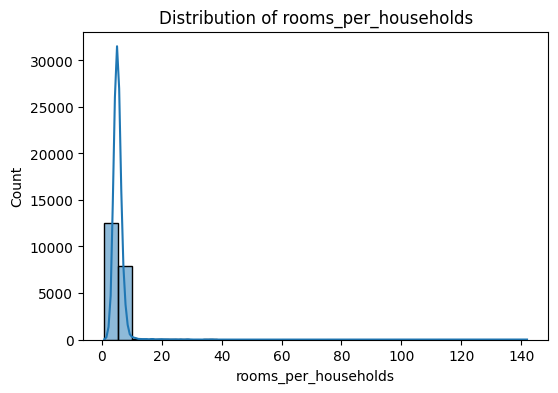

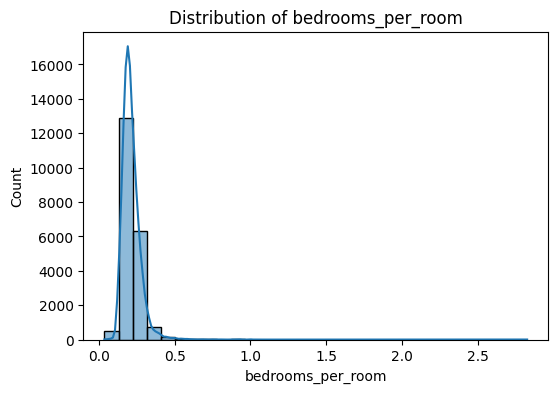

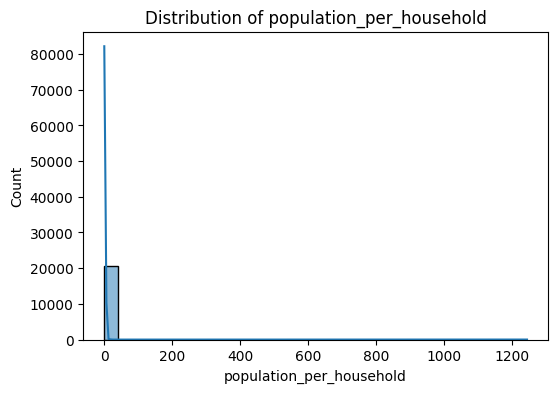

In [15]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

In [16]:
df.describe()

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_households,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,3.870671,206855.816909,5.429000,0.213794,3.070655
std,2.003532,2.135952,12.585558,1.899822,115395.615874,2.474173,0.065248,10.386050
min,-124.350000,32.540000,1.000000,0.499900,14999.000000,0.846154,0.037151,0.692308
25%,-121.800000,33.930000,18.000000,2.563400,119600.000000,4.440716,0.175225,2.429741
50%,-118.490000,34.260000,29.000000,3.534800,179700.000000,5.229129,0.203159,2.818116
75%,-118.010000,37.710000,37.000000,4.743250,264725.000000,6.052381,0.240126,3.282261
max,-114.310000,41.950000,52.000000,15.000100,500001.000000,141.909091,2.824675,1243.333333


In [18]:
import numpy as np

right_skewed_cols = [
    'population_per_household',
    'rooms_per_households',
    'bedrooms_per_room',
    'median_income',
    'median_house_value'
]

for col in right_skewed_cols:
    df[col] = np.log1p(df[col])

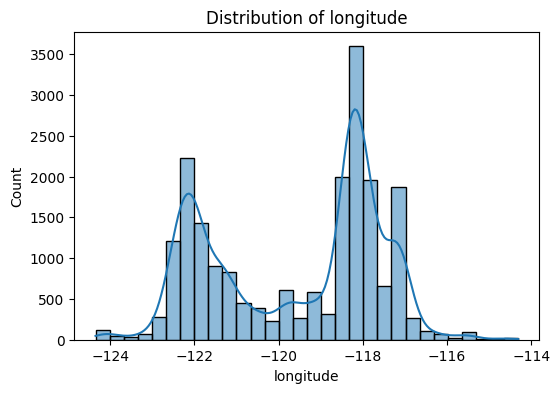

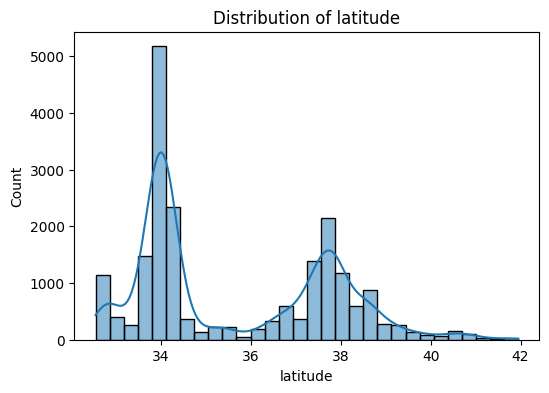

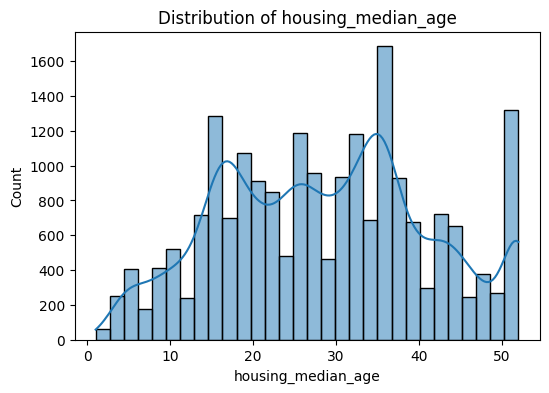

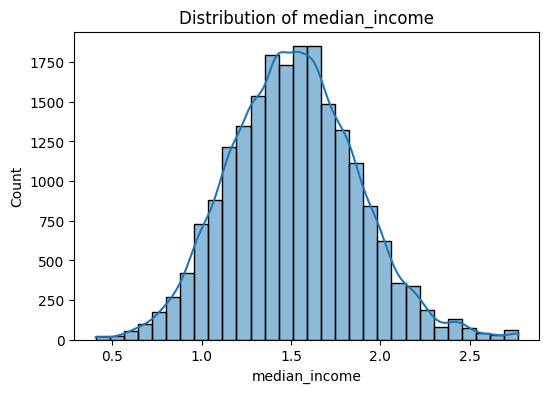

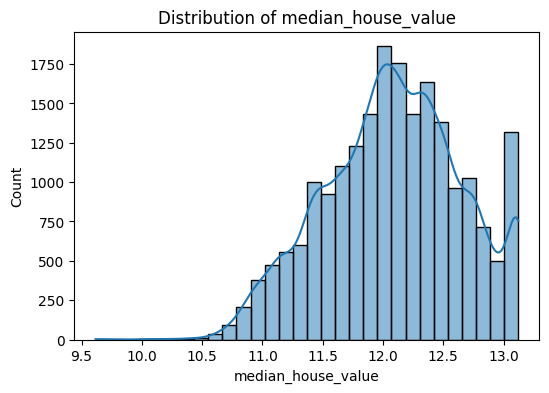

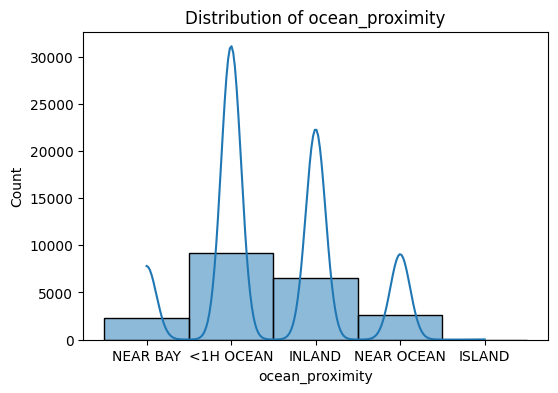

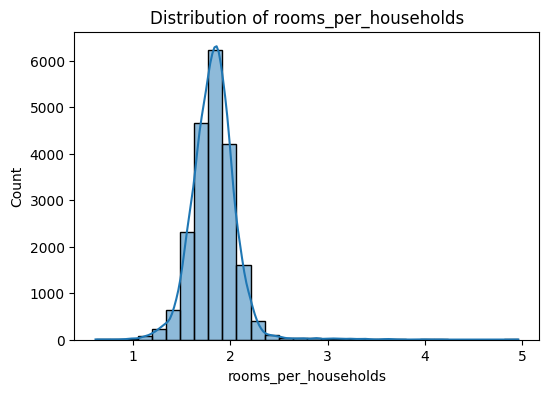

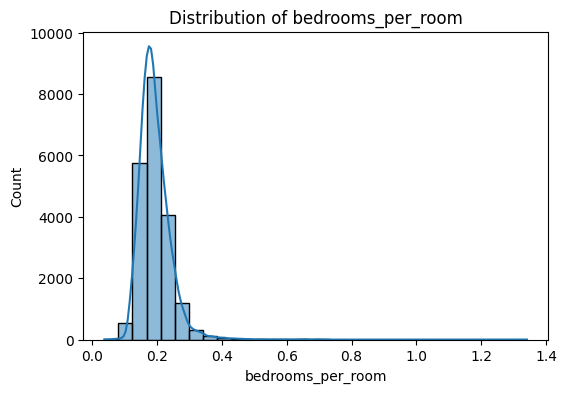

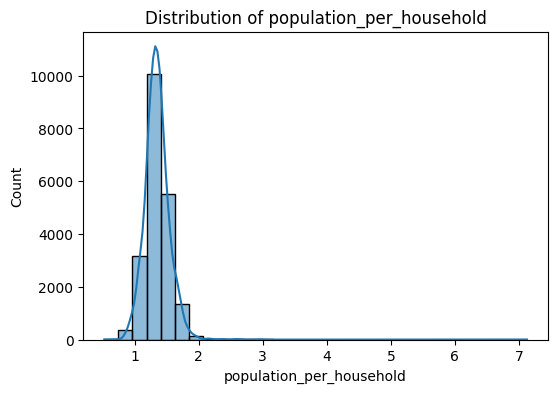

In [19]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

In [20]:
# Define manual encoding
custom_encoding = {
    '<1H OCEAN': 0,
    'INLAND': 1,
    'NEAR OCEAN': 2,
    'NEAR BAY': 3,
    'ISLAND': 4
}

# Apply encoding
df['ocean_proximity_encoded'] = df['ocean_proximity'].map(custom_encoding)
df.drop(columns='ocean_proximity',inplace=True)

In [21]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_households,bedrooms_per_room,population_per_household,ocean_proximity_encoded
0,-122.23,37.88,41.0,2.232720,13.022766,2.077455,0.136793,1.268511,3
1,-122.22,37.86,21.0,2.230165,12.789687,1.979364,0.144790,1.134572,3
2,-122.24,37.85,52.0,2.111110,12.771673,2.228738,0.121789,1.335596,3
3,-122.25,37.85,52.0,1.893579,12.740520,1.919471,0.169286,1.266369,3
4,-122.25,37.85,52.0,1.578195,12.743154,1.985385,0.158793,1.157342,3


In [22]:
print(df.skew())

longitude                  -0.297801
latitude                    0.465953
housing_median_age          0.060331
median_income               0.226083
median_house_value         -0.173166
rooms_per_households        1.390761
bedrooms_per_room           2.796456
population_per_household    3.879679
ocean_proximity_encoded     0.845744
dtype: float64


In [23]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transfromed= scaler.transform(X_test)


In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transfromed)


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


MAE: 0.251886290603913
MSE: 0.12621919194212838
RMSE: 0.35527340449592953
R2 Score: 0.6111083657825553


In [33]:
# MAE: On average, the model’s predictions are off by about 0.25 units from the actual values.

# MSE: The average squared error between predictions and actual values is 0.13, penalizing larger errors more.

# RMSE: The typical prediction error magnitude is about 0.36 units, reflecting error scale in original units.

# R² Score: The model explains 61% of the variance in the target variable.

SyntaxError: invalid character '’' (U+2019) (<ipython-input-33-cd7e28b16f41>, line 1)